In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(15,6))
%matplotlib inline

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

Détermination des caractéristiques du Pokémon à naître
À noter que les caractéristiques du Pokémon (statistiques, sexe, etc.) sont déterminées quand on obtient l’œuf, et non quand il éclot. Il est donc inutile de sauvegarder juste avant l’éclosion en espérant obtenir un meilleur Pokémon (mais plutôt avant l'obtention de l’œuf auprès de l'hôte).

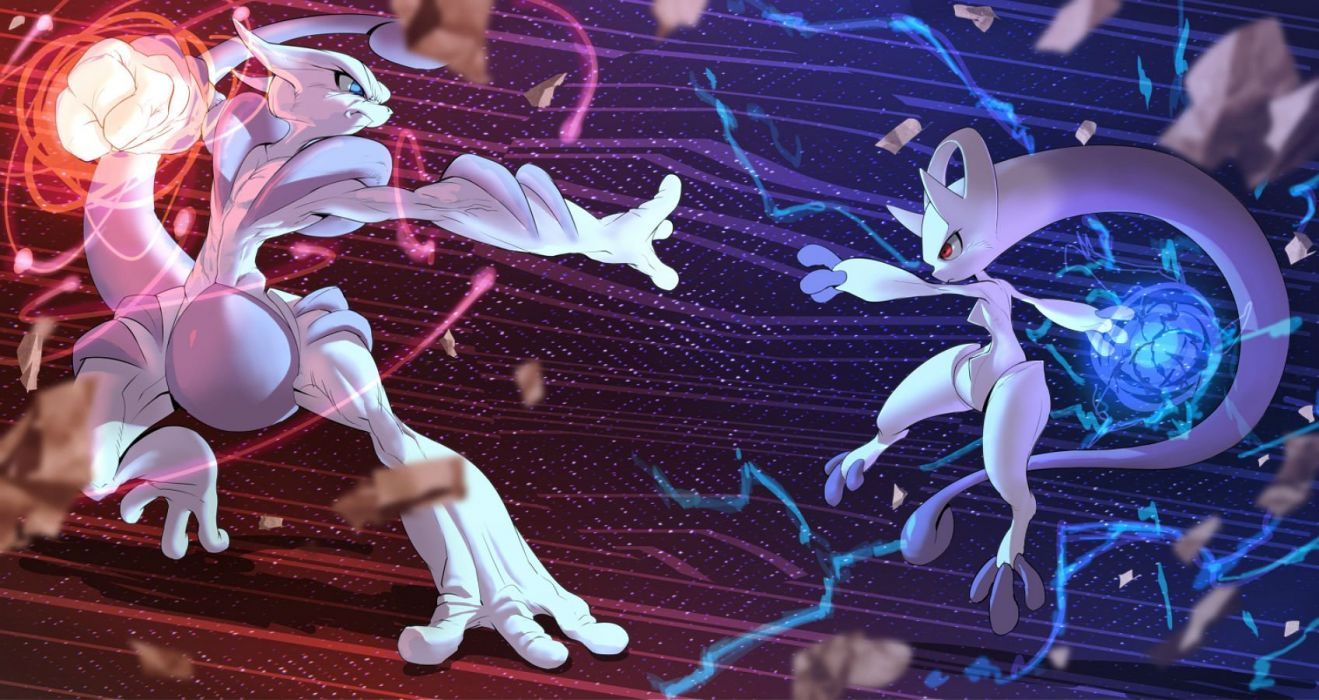

In [3]:
from IPython.display import Image
Image(filename='mewtwo.jpg')

In [4]:
KPI = ["base_egg_steps" , "sp_attack" , "attack" ,"capture_rate"]
KPI

['base_egg_steps', 'sp_attack', 'attack', 'capture_rate']

In [105]:
df = pd.read_csv('pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


801 rows × 41 columns

In [6]:
#801 rows × 41 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [7]:
#je commence par lres 
#je verifie les nan
df.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


Je change de place les columns

In [106]:
cols = list(df.columns.values)
print(cols , end = "")
df = df[['japanese_name', 'name','abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary']]

['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name', 'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary']

In [107]:
#je regarde mon DF
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [108]:
df.head()

,japanese_name,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Fushigidaneフシギダネ,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Fushigisouフシギソウ,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Fushigibanaフシギバナ,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Hitokageヒトカゲ,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,Lizardoリザード,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
df.count()

In [16]:
#Voici une liste de Pokémon en fonction du nombre de cycles d'oeufs nécessaires à l'éclosion sans aucun modificateur.
df[["name","abilities","base_egg_steps","base_total","base_total","capture_rate"]].sample(25)

,name,abilities,base_egg_steps,base_total,base_total,capture_rate
392,Piplup,"['Torrent', 'Defiant']",5120,314,314,45
171,Pichu,"['Static', 'Lightningrod']",2560,205,205,190
443,Gabite,"['Sand Veil', 'Rough Skin']",10240,410,410,45
504,Watchog,"['Illuminate', 'Keen Eye', 'Analytic']",5120,420,420,255
246,Pupitar,['Shed Skin'],10240,410,410,45
97,Krabby,"['Hyper Cutter', 'Shell Armor', 'Sheer Force']",5120,325,325,225
244,Suicune,"['Pressure', 'Inner Focus']",20480,580,580,3
611,Haxorus,"['Rivalry', 'Mold Breaker', 'Unnerve']",10240,540,540,45
558,Scraggy,"['Shed Skin', 'Moxie', 'Intimidate']",3840,348,348,180
240,Miltank,"['Thick Fat', 'Scrappy', 'Sap Sipper']",5120,490,490,45


In [17]:
df[df["base_egg_steps"] > 30000][["name","abilities","base_egg_steps","base_total","base_total","capture_rate"]]

,name,abilities,base_egg_steps,base_total,base_total,capture_rate
149,Mewtwo,"['Pressure', 'Unnerve']",30720,780,780,3
150,Mew,['Synchronize'],30720,600,600,45
248,Lugia,"['Pressure', 'Multiscale']",30720,680,680,3
249,Ho-Oh,"['Pressure', 'Regenerator']",30720,680,680,3
250,Celebi,['Natural Cure'],30720,600,600,45
379,Latias,['Levitate'],30720,700,700,3
380,Latios,['Levitate'],30720,700,700,3
381,Kyogre,['Drizzle'],30720,770,770,3
382,Groudon,['Drought'],30720,770,770,3
383,Rayquaza,['Air Lock'],30720,780,780,45


In [ ]:
layout_comp = go.Layout(
    title='rarest and hardest pokemon to hatch',
    hovermode='closest')

In [ ]:
layout_comp = go.Layout(
    title='rarest and hardest pokemon to hatch',
    barmode='group')
x = df.capture_rate 
y = df.base_egg_steps
data_comp = go.Bar(x=x,y=y,text = df.name,mode = 'markers',marker=dict(size=12,
                line=dict(width=1)))
#fig_comp = go.Figure(data=[data_comp], layout=layout_comp )

In [ ]:
import plotly 
plotly.tools.set_credentials_file(username='funnyeoman', api_key='wBb6Hzt0I0NbIPNCqetS')

In [ ]:
#TOUT AFFICHER
pd.options.display.max_columns = True
#display(df[df['name']== "Onix"])

Difficuler d'apprivoisemment par rapport au nombre de pas 

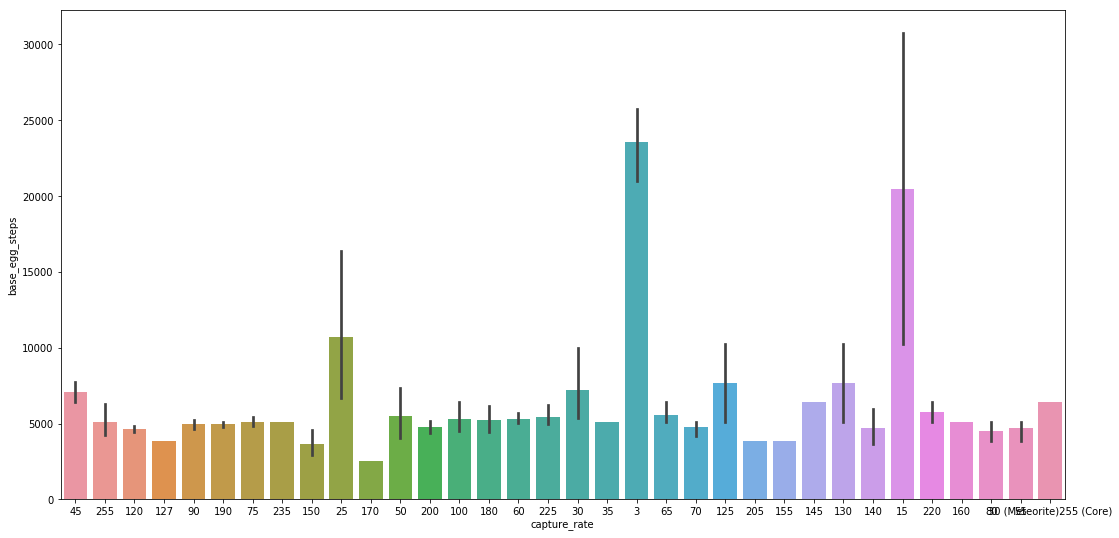

In [117]:
#copa
plt.figure(figsize=(18,9))
sns.barplot(x = "capture_rate", y = "base_egg_steps" , data = df )
plt.show()

J'ai pu faire un lien entre le taux de reussite de capture et le temps d'éclosion

Utilisation d'un regex

In [97]:
#j'ordonne mon df par hp 
df_HP["capture_rate"] = df_HP["capture_rate"].str.extract('(\d+)')
df_HP = df_HP.sort_values('capture_rate' , ascending=True)
df_HP.capture_rate  = pd.to_numeric(df_HP.capture_rate , errors='ignore')
df_HP.capture_rate.unique()
df_HP[['hp','capture_rate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 63 to 165
Data columns (total 2 columns):
hp              801 non-null int64
capture_rate    801 non-null int64
dtypes: int64(2)
memory usage: 18.8 KB


Chaque Pokémon du jeu commence par un certain nombre de PV ou de points de vie lorsqu'il est capturé. Lorsque vous utilisez votre Pokémon dans une bataille contre d'autres joueurs - par exemple, lorsque vous attaquez ou défendez un gymnase - tout dommage causé à votre Pokémon est soustrait du nombre total de points de vie de ce dernier. Ainsi, HP est un peu comme une mesure de l'endurance et de la santé de vos Pokémon. Et certains ont beaucoup plus que d'autres .

Si vous voulez vous assurer que votre Pokédex est rempli avec beaucoup de HP, il y a certainement des Pokémon spécifiques à rechercher. Le Pokémon qui a le plus de HP est Chansey avec un total de 500, bien au-dessus de tous les autres Pokémon, il peut donc survivre à pas mal de hits:


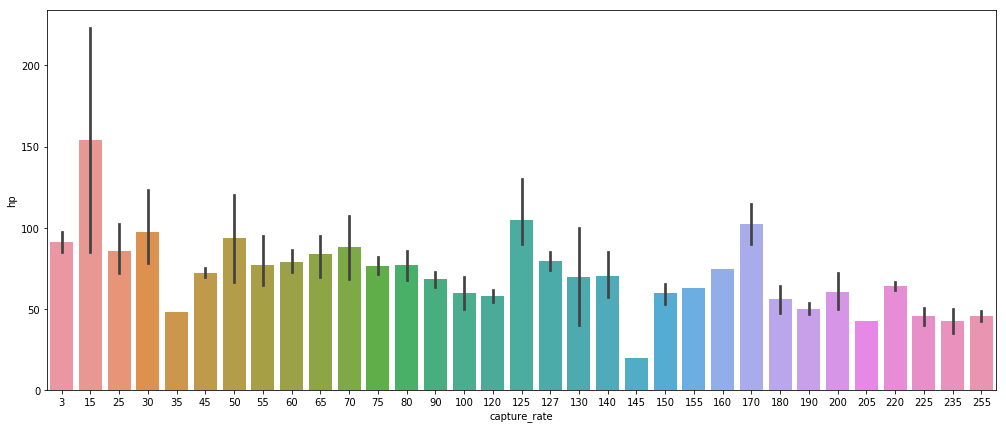

In [98]:
plt.figure(figsize=(17,7))
sns.barplot(x = "capture_rate", y = "hp" , data = df_HP )

In [55]:
df[(df.sp_attack > 100) & (df.base_egg_steps > 15000)][["name","sp_attack","abilities","base_egg_steps","base_total","base_total","capture_rate","hp"]]

,name,sp_attack,abilities,base_egg_steps,base_total,base_total,capture_rate,hp
144,Zapdos,125,"['Pressure', 'Static']",20480,580,580,3,90
145,Moltres,125,"['Pressure', 'Flame Body']",20480,580,580,3,90
149,Mewtwo,194,"['Pressure', 'Unnerve']",30720,780,780,3,106
242,Raikou,115,"['Pressure', 'Inner Focus']",20480,580,580,3,90
249,Ho-Oh,110,"['Pressure', 'Regenerator']",30720,680,680,3,106
379,Latias,140,['Levitate'],30720,700,700,3,80
380,Latios,160,['Levitate'],30720,700,700,3,80
381,Kyogre,180,['Drizzle'],30720,770,770,3,100
382,Groudon,150,['Drought'],30720,770,770,3,100
383,Rayquaza,180,['Air Lock'],30720,780,780,45,105


Temps d'éclosion par rapport à l'atttaque spécial

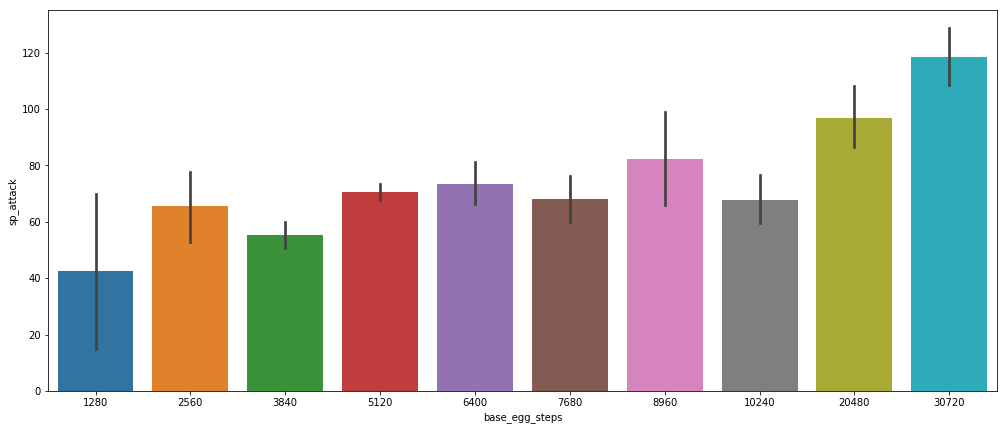

In [56]:
plt.figure(figsize=(17,7))
sns.barplot(x = "base_egg_steps" , y = "sp_attack" , data = df )

Temps d'éclosion par rapport à l'atttaque 

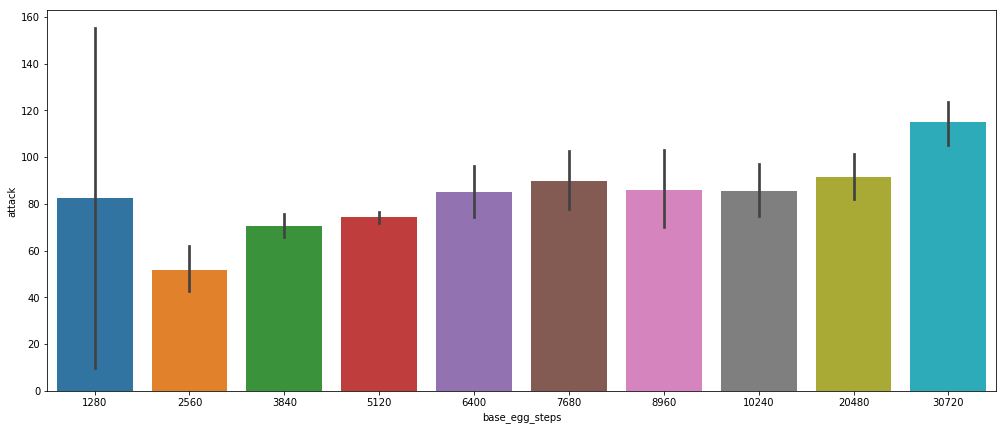

In [57]:
plt.figure(figsize=(17,7))
sns.barplot(x = "base_egg_steps" , y = "attack" , data = df )

(nombre de pas )Temps d'éclosion par rapport à la DEFENCE

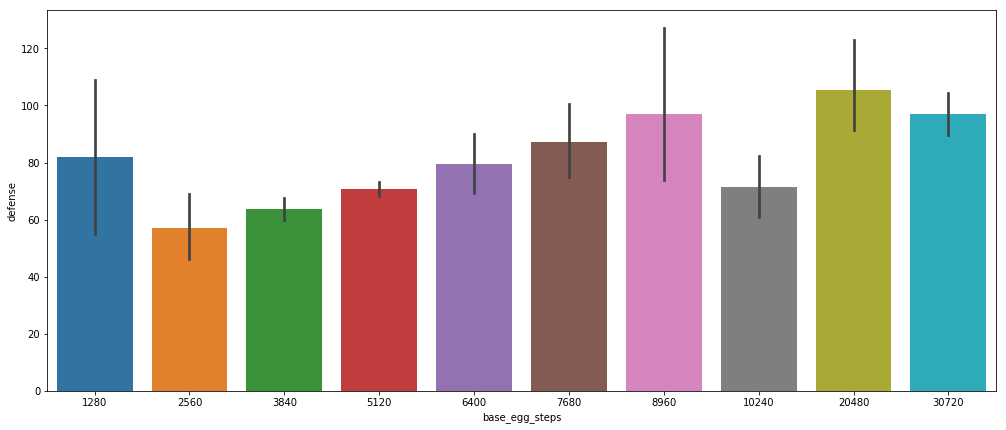

In [58]:
plt.figure(figsize=(17,7))
sns.barplot(x = "base_egg_steps" , y = "defense" , data = df)

nombre de pas par rapport qualité de carte

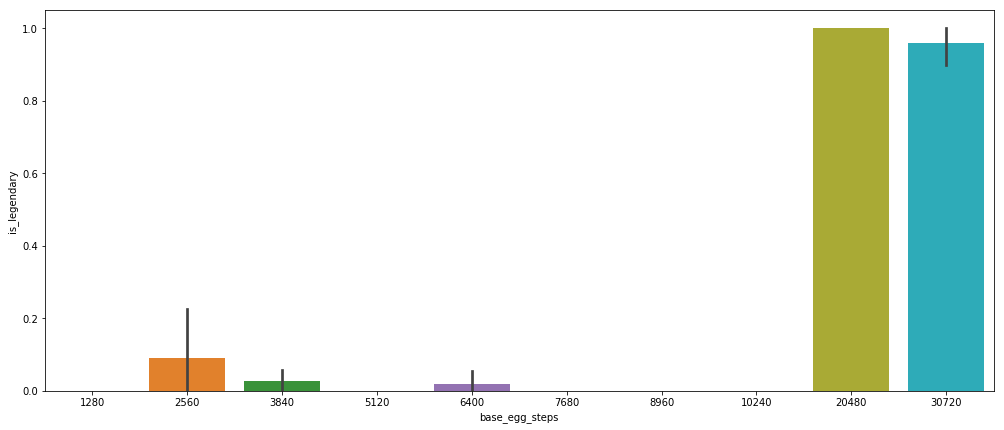

In [59]:
plt.figure(figsize=(17,7))
sns.barplot(x = "base_egg_steps" , y = "is_legendary" , data = df) 

nombre de pas par rapport a la vitesse d'attaque

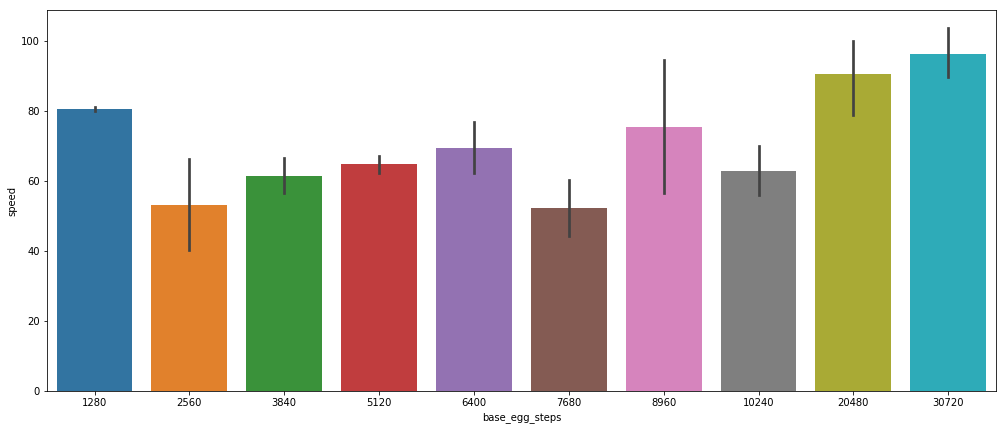

In [114]:
plt.figure(figsize=(17,7))
sns.barplot(x = "base_egg_steps" , y = "speed" , data = df) 

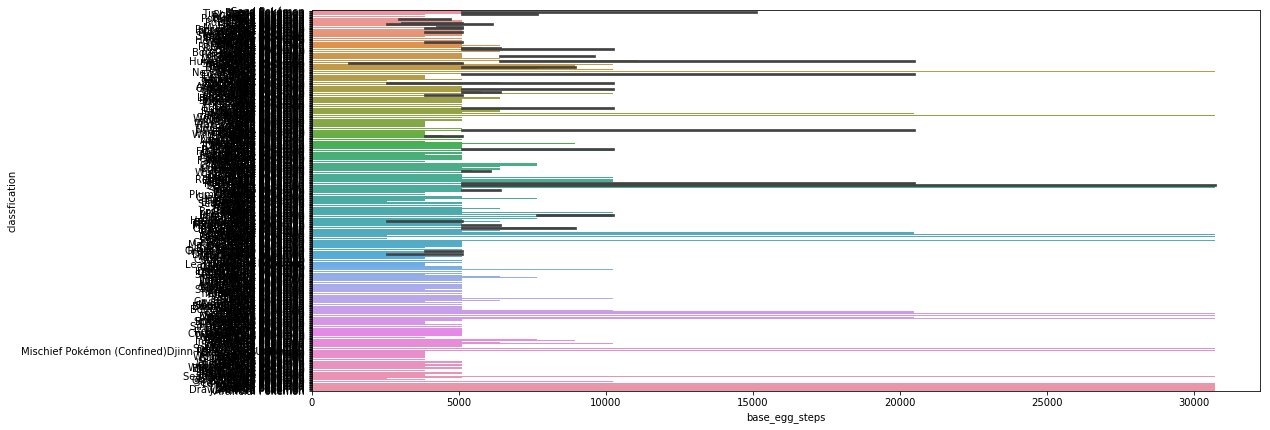

In [112]:
plt.figure(figsize=(17,7))
sns.barplot(x = "base_egg_steps" , y = "classfication" , data = df) 

In [115]:
df.count()

japanese_name        801
name                 801
abilities            801
against_bug          801
against_dark         801
against_dragon       801
against_electric     801
against_fairy        801
against_fight        801
against_fire         801
against_flying       801
against_ghost        801
against_grass        801
against_ground       801
against_ice          801
against_normal       801
against_poison       801
against_psychic      801
against_rock         801
against_steel        801
against_water        801
attack               801
base_egg_steps       801
base_happiness       801
base_total           801
capture_rate         801
classfication        801
defense              801
experience_growth    801
height_m             781
hp                   801
percentage_male      703
pokedex_number       801
sp_attack            801
sp_defense           801
speed                801
type1                801
type2                417
weight_kg            781
generation           801


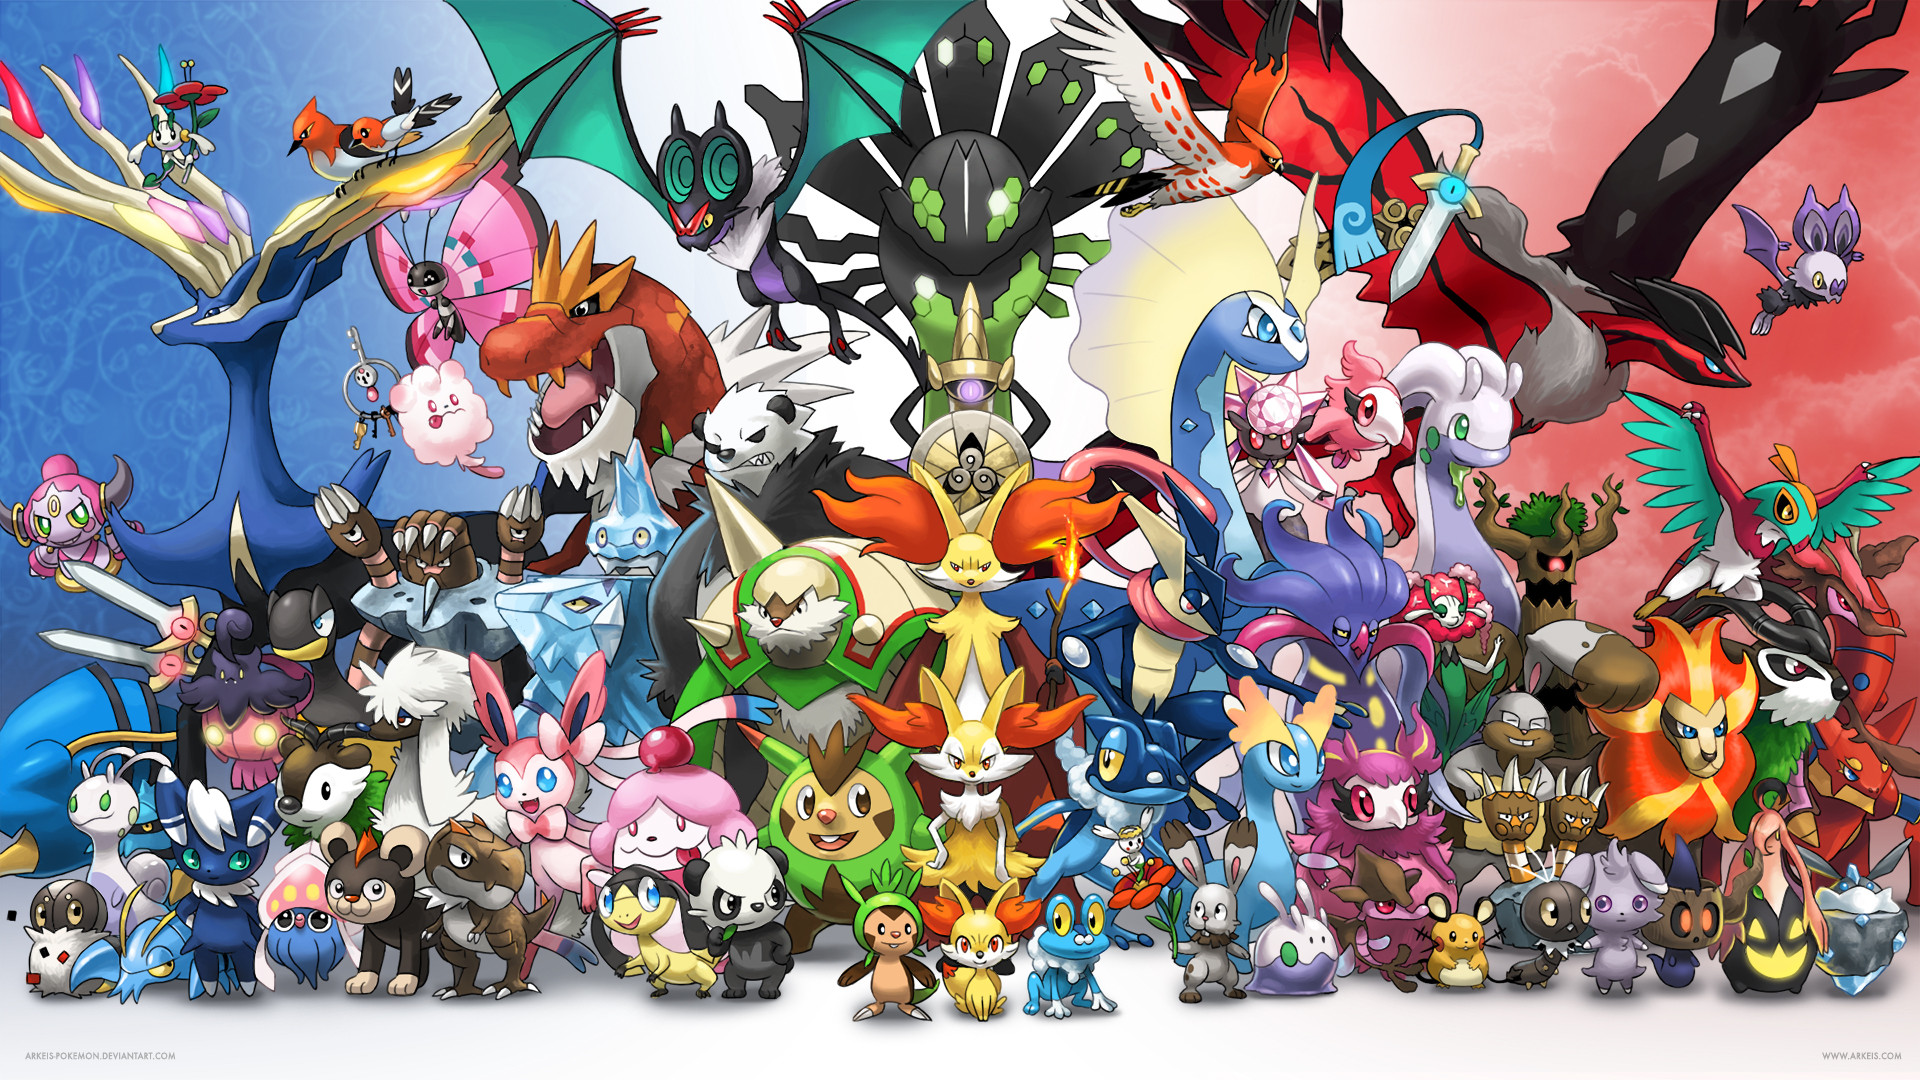

In [60]:
from IPython.display import Image
Image(filename='pokemon_leg.jpg')

PERSPECTIVE :
    
PERMETTRE LA PREDICTION DE LA VALEUR D'UN OEUF